In [1]:
import tensorflow as tf
tf.executing_eagerly()
from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(
    allow_soft_placement=True,
    log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1060 3GB, pci bus id: 0000:06:00.0, compute capability: 6.1



In [3]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

print(tf.__version__)

2.1.0


In [5]:
import os
import json
from glob import glob

In [6]:
TRAIN_PREFIX = 'data\\train_resized'

def load_annotations():
    boxes = dict()
    for path in glob('data\\train_resized\\*.json'):
        label = os.path.basename(path).split('_', 1)[0]
        with open(path) as src:
            for annot in json.load(src):
                basename = os.path.basename(annot['filename']).replace('.xml', '.JPG')
                annot['filename'] = os.path.join(
                    TRAIN_PREFIX, basename)
                rect = annot['annotation']
                rect['x'] += rect['width'] / 2
                rect['y'] += rect['height'] / 2
                if os.path.isfile(annot['filename']):
                    boxes.setdefault(label, []).append(annot)
    return boxes

def draw_boxes(annotation, rect=None, image_size=None):
    
    def _draw(img, rect, scale_x, scale_y, color=(0, 255, 0)):

        pt1 = (int((rect['x'] - rect['width'] / 2) * scale_x),
                int((rect['y'] - rect['height'] / 2) * scale_y))
        pt2 = (int((rect['x'] + rect['width'] / 2) * scale_x),
                int((rect['y'] + rect['height'] / 2) * scale_y))
        img = cv2.rectangle(img.copy(), pt1, pt2, 
                            color=color, thickness=4)
        
#         font                   = cv2.FONT_HERSHEY_SIMPLEX
#         bottomLeftCornerOfText = (int((rect['x'] - rect['width'] / 2) * scale_x),
#                                     int((rect['y'] - rect['height'] / 2) * scale_y)-10)
#         fontScale              = 1
#         fontColor              = (0,255,255)
#         lineType               = 2
#         img = cv2.putText(img.copy(),rect['number'], 
#                             bottomLeftCornerOfText, 
#                             font, 
#                             fontScale,
#                             fontColor,
#                             lineType)
              
        return img
    
    scale_x, scale_y = 1., 1.
    img = plt.imread(annotation['filename'], cv2.IMREAD_COLOR)
    if image_size is not None:
        scale_x = 1. * image_size[0] / img.shape[1]
        scale_y = 1. * image_size[1] / img.shape[0]
        img = cv2.resize(img, image_size)
    if len(annotation)>1:     
        img = _draw(img, annotation.get('annotation', []), scale_x, scale_y)
    
    if rect is not None:
        img = _draw(img, rect, 1., 1., (255, 0, 0))

    return img

In [7]:
boxes = load_annotations()  # загружаем разметку детекций

In [8]:
boxes

{'autonumber': [{'annotation': {'class': 'rect',
    'width': 189.0,
    'height': 69.0,
    'x': 984.5,
    'y': 540.5,
    'number': 'Y001BC102'},
   'class': 'image',
   'filename': 'data\\train_resized\\Y001BC-102.JPG'},
  {'annotation': {'class': 'rect',
    'width': 186.0,
    'height': 41.0,
    'x': 783.0,
    'y': 557.5,
    'number': 'Y001BC178'},
   'class': 'image',
   'filename': 'data\\train_resized\\Y001BC-178.JPG'},
  {'annotation': {'class': 'rect',
    'width': 199.0,
    'height': 43.0,
    'x': 520.5,
    'y': 485.5,
    'number': 'Y001BH56'},
   'class': 'image',
   'filename': 'data\\train_resized\\Y001BH-56.JPG'},
  {'annotation': {'class': 'rect',
    'width': 144.0,
    'height': 41.0,
    'x': 341.0,
    'y': 529.5,
    'number': 'Y001BH69'},
   'class': 'image',
   'filename': 'data\\train_resized\\Y001BH-69.JPG'},
  {'annotation': {'class': 'rect',
    'width': 190.0,
    'height': 46.0,
    'x': 837.0,
    'y': 546.0,
    'number': 'Y001BK55'},
   'class': 

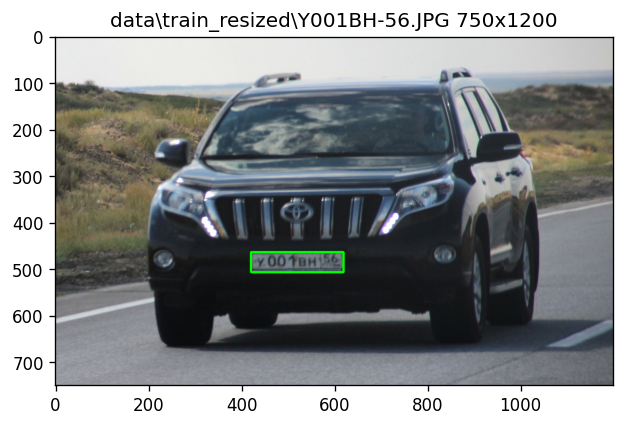

In [9]:
from matplotlib import pyplot as plt


annotation = boxes['autonumber'][2]

img = draw_boxes(annotation)

plt.figure(figsize=(6, 6), dpi=120)
plt.imshow(img)
plt.title('{} {}x{}'.format(
    annotation['filename'], img.shape[0], img.shape[1]));

In [10]:
[box['annotation']
                   for box in sum(boxes.values(), [])]

[{'class': 'rect',
  'width': 189.0,
  'height': 69.0,
  'x': 984.5,
  'y': 540.5,
  'number': 'Y001BC102'},
 {'class': 'rect',
  'width': 186.0,
  'height': 41.0,
  'x': 783.0,
  'y': 557.5,
  'number': 'Y001BC178'},
 {'class': 'rect',
  'width': 199.0,
  'height': 43.0,
  'x': 520.5,
  'y': 485.5,
  'number': 'Y001BH56'},
 {'class': 'rect',
  'width': 144.0,
  'height': 41.0,
  'x': 341.0,
  'y': 529.5,
  'number': 'Y001BH69'},
 {'class': 'rect',
  'width': 190.0,
  'height': 46.0,
  'x': 837.0,
  'y': 546.0,
  'number': 'Y001BK55'},
 {'class': 'rect',
  'width': 125.0,
  'height': 69.0,
  'x': 206.5,
  'y': 415.5,
  'number': 'Y001BK72'},
 {'class': 'rect',
  'width': 157.0,
  'height': 43.0,
  'x': 268.5,
  'y': 449.5,
  'number': 'Y001BM138'},
 {'class': 'rect',
  'width': 101.0,
  'height': 19.0,
  'x': 291.5,
  'y': 634.5,
  'number': 'Y001BM45'},
 {'class': 'rect',
  'width': 148.0,
  'height': 30.0,
  'x': 903.0,
  'y': 383.0,
  'number': 'Y001BM54'},
 {'class': 'rect',
  'wid

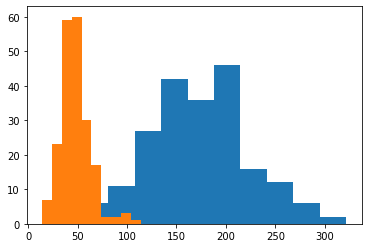

In [11]:
annotations = [box['annotation']
                   for box in sum(boxes.values(), [])]

widths = [rect['width'] for rect in annotations]
heights = [rect['height'] for rect in annotations]

plt.hist(widths)
plt.hist(heights);

In [105]:
from tensorflow.keras.applications import vgg16

IMG_HEIGHT = 750
IMG_WIDTH = 1200

features = vgg16.VGG16(weights='imagenet',
                       include_top=False,
                       input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# дообучаем последние 5 слоев
for layer in features.layers[:-5]:
    layer.trainable = False
    
feature_tensor = features.layers[-1].output
print(feature_tensor.shape)

(None, 23, 37, 512)


In [106]:
FEATURE_SHAPE = (feature_tensor.shape[1],
                 feature_tensor.shape[2])

GRID_STEP_H = IMG_HEIGHT / FEATURE_SHAPE[0]
GRID_STEP_W = IMG_WIDTH / FEATURE_SHAPE[1]

ANCHOR_WIDTH = 50.
ANCHOR_HEIGHT = 200. 

# сетка якорей, размер определяется соотношением 
# размера входного изображения и размером тензора признаков
ANCHOR_CENTERS = np.mgrid[GRID_STEP_H/2:IMG_HEIGHT:GRID_STEP_H,
                          GRID_STEP_W/2:IMG_WIDTH:GRID_STEP_W]

In [107]:
def iou(rect, x_scale, y_scale, anchor_x, anchor_y,
        anchor_w=ANCHOR_WIDTH, anchor_h=ANCHOR_HEIGHT):
    
    rect_x1 = (rect['x'] - rect['width'] / 2) * x_scale
    rect_x2 = (rect['x'] + rect['width'] / 2) * x_scale
    
    rect_y1 = (rect['y'] - rect['height'] / 2) * y_scale
    rect_y2 = (rect['y'] + rect['height'] / 2) * y_scale
    
    anch_x1, anch_x2 = anchor_x - anchor_w / 2, anchor_x + anchor_w / 2
    anch_y1, anch_y2 = anchor_y - anchor_h / 2, anchor_y + anchor_h / 2
    
    dx = (min(rect_x2, anch_x2) - max(rect_x1, anch_x1))
    dy = (min(rect_y2, anch_y2) - max(rect_y1, anch_y1))
    
    intersection = dx * dy if (dx > 0 and dy > 0) else 0.
    
    anch_square = (anch_x2 - anch_x1) * (anch_y2 - anch_y1)
    rect_square = (rect_x2 - rect_x1) * (rect_y2 - rect_y1)
    union = anch_square + rect_square - intersection
    
    return intersection / union

def encode_anchors(annotation, img_shape, iou_thr=0.5):
    encoded = np.zeros(shape=(FEATURE_SHAPE[0],
                              FEATURE_SHAPE[1], 5), dtype=np.float32)
    x_scale = 1. * IMG_WIDTH / img_shape[1]
    y_scale = 1. * IMG_HEIGHT / img_shape[0]
    for rect in [annotation['annotation']]:
        scores = []
        for row in range(FEATURE_SHAPE[0]):
            for col in range(FEATURE_SHAPE[1]):
                anchor_x = ANCHOR_CENTERS[1, row, col]
                anchor_y = ANCHOR_CENTERS[0, row, col]
                score = iou(rect, x_scale, y_scale, anchor_x, anchor_y)
                scores.append((score, anchor_x, anchor_y, row, col))
        
        scores = sorted(scores, reverse=True)
        if scores[0][0] < iou_thr:
            scores = [scores[0]]  # default anchor
        else:
            scores = [e for e in scores if e[0] > iou_thr]

        for score, anchor_x, anchor_y, row, col in scores:
            dx = (anchor_x - rect['x'] * x_scale) / ANCHOR_WIDTH
            dy = (anchor_y - rect['y'] * y_scale) / ANCHOR_HEIGHT
            dw = (ANCHOR_WIDTH - rect['width'] * x_scale) / ANCHOR_WIDTH
            dh = (ANCHOR_HEIGHT - rect['height'] * y_scale) / ANCHOR_HEIGHT
            encoded[row, col] = [1., dx, dy, dw, dh]
            
    return encoded

def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def decode_prediction(prediction, conf_thr=0.1):
    rectangles = []
    for row in range(FEATURE_SHAPE[0]):
        for col in range(FEATURE_SHAPE[1]):
            logit, dx, dy, dw, dh = prediction[row, col]
            conf = _sigmoid(logit)
            if conf > conf_thr:
                anchor_x = ANCHOR_CENTERS[1, row, col]
                anchor_y = ANCHOR_CENTERS[0, row, col]
                rectangles.append({'x': anchor_x - dx * ANCHOR_WIDTH,
                                   'y': anchor_y - dy * ANCHOR_HEIGHT,
                                   'width': ANCHOR_WIDTH - dw * ANCHOR_WIDTH,
                                   'height': ANCHOR_HEIGHT - dh * ANCHOR_HEIGHT,
                                   'conf': conf})
    return rectangles

def non_max_suppression(rectangles, max_output_size, iou_threshold=0.5):
    if not rectangles:
        return rectangles
    
    boxes = [[r['y'],
              r['x'],
              r['y'] + r['height'],
              r['x'] + r['width']] for r in rectangles]
    scores = [r['conf'] for r in rectangles]
    
    boxes = tf.dtypes.cast(boxes,tf.float32)
    scores = tf.dtypes.cast(scores,tf.float32)
    
    indices = tf.image.non_max_suppression(np.array(boxes),
                                           np.array(scores),
                                           max_output_size,
                                           iou_threshold)
    
    return [rectangles[i] for i in indices]

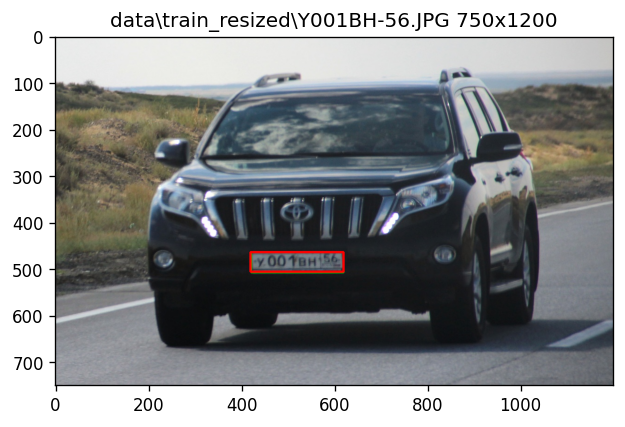

In [108]:
annotation = boxes['autonumber'][2]
encoded = encode_anchors(annotation,
                         img_shape=(IMG_HEIGHT, IMG_WIDTH),
                         iou_thr=0.5)

decoded = decode_prediction(encoded, conf_thr=0.7)
decoded = sorted(decoded, key = lambda e: -e['conf'])
plt.figure(figsize=(6, 6), dpi=120)
plt.imshow(draw_boxes(annotation, decoded[0]))
plt.title('{} {}x{}'.format(
    annotation['filename'], img.shape[0], img.shape[1]));

In [109]:
K = tf.keras.backend

def confidence_loss(y_true, y_pred):
    conf_loss = K.binary_crossentropy(y_true[..., 0], 
                                      y_pred[..., 0],
                                      from_logits=True)
    return conf_loss

def smooth_l1(y_true, y_pred):
    abs_loss = K.abs(y_true[..., 1:] - y_pred[..., 1:])
    square_loss = 0.5 * K.square(y_true[..., 1:] - y_pred[..., 1:])
    mask = K.cast(K.greater(abs_loss, 1.), 'float32')
    total_loss = (abs_loss - 0.5) * mask + 0.5 * square_loss * (1. - mask)
    return K.sum(total_loss, axis=-1)

def total_loss(y_true, y_pred, neg_pos_ratio=3):
    batch_size = K.shape(y_true)[0]
    
    # TODO: добавьте функцию потерь для классификации детекции
    
    y_true = K.reshape(y_true, (batch_size, -1, 5))
    y_pred = K.reshape(y_pred, (batch_size, -1, 5))

    # confidence loss
    conf_loss = confidence_loss(y_true, y_pred)
    
    # smooth l1 loss
    loc_loss = smooth_l1(y_true, y_pred)
    
    # positive examples loss
    pos_conf_loss = K.sum(conf_loss * y_true[..., 0], axis=-1)
    pos_loc_loss = K.sum(loc_loss * y_true[..., 0], axis=-1)
    
    # negative examples loss
    anchors = K.shape(y_true)[1]
    num_pos = K.sum(y_true[..., 0], axis=-1)
    num_pos_avg = K.mean(num_pos)
    num_neg = K.min([neg_pos_ratio * (num_pos_avg) + 1., K.cast(anchors, 'float32')])
    
    # hard negative mining
    neg_conf_loss, _ = tf.nn.top_k(conf_loss * (1. - y_true[..., 0]),
                                   k=K.cast(num_neg, 'int32'))

    neg_conf_loss = K.sum(neg_conf_loss, axis=-1)
    
    # total conf loss
    total_conf_loss = (neg_conf_loss + pos_conf_loss) / (num_neg + num_pos + 1e-32)
    loc_loss = pos_loc_loss / (num_pos + 1e-32)
    
    return total_conf_loss + 0.5 * loc_loss

In [110]:
from random import shuffle

def load_img(path, target_size=(IMG_WIDTH, IMG_HEIGHT)):
    img = plt.imread(path, cv2.IMREAD_COLOR)[...,::-1]
    img_shape = img.shape
    img_resized = cv2.resize(img, target_size)
    return img_shape, vgg16.preprocess_input(img_resized.astype(np.float32))

def data_generator(boxes, batch_size=32):
    boxes = sum(boxes.values(), [])
    while True:
        shuffle(boxes)
        for i in range(len(boxes)//batch_size):
            X, y = [], []
            for j in range(i*batch_size,(i+1)*batch_size):
                img_shape, img = load_img(boxes[j]['filename'])
                # TODO: добавьте one-hot encoding в разметку для классов
                y.append(encode_anchors(boxes[j], img_shape))
                X.append(img)
            yield np.array(X), np.array(y)

In [111]:
output = tf.keras.layers.BatchNormalization()(feature_tensor)

output = tf.keras.layers.Conv2D(512,
                                kernel_size=(1, 1), 
                                activation='linear',
                                kernel_regularizer='l2')(output)

# TODO: добавьте выходы для классификации детекции
output = tf.keras.layers.Conv2D(5,
                                kernel_size=(1, 1), 
                                activation='linear',
                                kernel_regularizer='l2')(output)

model = tf.keras.models.Model(inputs=features.inputs, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 750, 1200, 3)]    0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 750, 1200, 64)     1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 750, 1200, 64)     36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 375, 600, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 375, 600, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 375, 600, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 187, 300, 128)     0   

In [112]:
adam = tf.keras.optimizers.Adam(lr=3e-4, decay=1e-6)
model.compile(optimizer=adam, 
              loss=total_loss,
              metrics=[confidence_loss])

In [113]:
# model.load_weights('autonumber_detector.hdf5')

In [114]:
batch_size = 3

gen = data_generator(boxes, batch_size=batch_size)
steps_per_epoch = sum(map(len, boxes.values()), 0) / batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'autonumber_detector.hdf5',
    monitor='loss',
    verbose=1,  
    save_best_only=True, 
    save_weights_only=False,
    mode='auto',
    save_freq=10)
with tf.device("/device:GPU:0"):
    model.fit(gen, 
              steps_per_epoch=steps_per_epoch,
              epochs=100,
              callbacks=[checkpoint])

  ...
    to  
  ['...']
Train for 68.0 steps
Epoch 1/100
 3/68 [>.............................] - ETA: 1:20 - loss: 12.9062 - confidence_loss: 0.8878
Epoch 00001: loss improved from inf to 9.75929, saving model to autonumber_detector.hdf5
 7/68 [==>...........................] - ETA: 51s - loss: 10.7919 - confidence_loss: 0.9064
Epoch 00001: loss improved from 9.75929 to 8.67876, saving model to autonumber_detector.hdf5
11/68 [===>..........................] - ETA: 41s - loss: 9.9171 - confidence_loss: 0.9144 
Epoch 00001: loss improved from 8.67876 to 7.77154, saving model to autonumber_detector.hdf5
15/68 [=====>........................] - ETA: 35s - loss: 9.3458 - confidence_loss: 0.8893
Epoch 00001: loss improved from 7.77154 to 7.53562, saving model to autonumber_detector.hdf5
19/68 [=======>......................] - ETA: 31s - loss: 8.8734 - confidence_loss: 0.8588
Epoch 00001: loss improved from 7.53562 to 6.98526, saving model to autonumber_detector.hdf5
23/68 [=========>.....

63/68 [==========================>...] - ETA: 2s - loss: 4.8816 - confidence_loss: 0.2984
Epoch 00003: loss improved from 4.61453 to 4.52550, saving model to autonumber_detector.hdf5
67/68 [============================>.] - ETA: 0s - loss: 4.8623 - confidence_loss: 0.2963
Epoch 00003: loss did not improve from 4.52550
68/68 [==============================] - 34s 502ms/step - loss: 4.8610 - confidence_loss: 0.2958
Epoch 4/100
 3/68 [>.............................] - ETA: 31s - loss: 4.6526 - confidence_loss: 0.2593
Epoch 00004: loss improved from 4.52550 to 4.48014, saving model to autonumber_detector.hdf5
 7/68 [==>...........................] - ETA: 32s - loss: 4.5966 - confidence_loss: 0.2585
Epoch 00004: loss improved from 4.48014 to 4.45241, saving model to autonumber_detector.hdf5
11/68 [===>..........................] - ETA: 30s - loss: 4.5426 - confidence_loss: 0.2580
Epoch 00004: loss improved from 4.45241 to 4.40389, saving model to autonumber_detector.hdf5
15/68 [=====>......

51/68 [=====================>........] - ETA: 8s - loss: 3.5447 - confidence_loss: 0.2218
Epoch 00006: loss did not improve from 3.42698
55/68 [=======================>......] - ETA: 6s - loss: 3.5388 - confidence_loss: 0.2220
Epoch 00006: loss improved from 3.42698 to 3.34783, saving model to autonumber_detector.hdf5
59/68 [=========================>....] - ETA: 4s - loss: 3.5299 - confidence_loss: 0.2223
Epoch 00006: loss did not improve from 3.34783
63/68 [==========================>...] - ETA: 2s - loss: 3.5279 - confidence_loss: 0.2226
Epoch 00006: loss did not improve from 3.34783
67/68 [============================>.] - ETA: 0s - loss: 3.5180 - confidence_loss: 0.2228
Epoch 00006: loss improved from 3.34783 to 3.30239, saving model to autonumber_detector.hdf5
68/68 [==============================] - 34s 506ms/step - loss: 3.5148 - confidence_loss: 0.2229
Epoch 7/100
 3/68 [>.............................] - ETA: 30s - loss: 3.2898 - confidence_loss: 0.2243
Epoch 00007: loss impro

35/68 [==============>...............] - ETA: 16s - loss: 2.5959 - confidence_loss: 0.2172
Epoch 00009: loss improved from 2.52868 to 2.51087, saving model to autonumber_detector.hdf5
39/68 [================>.............] - ETA: 14s - loss: 2.5895 - confidence_loss: 0.2167
Epoch 00009: loss improved from 2.51087 to 2.49161, saving model to autonumber_detector.hdf5
43/68 [=================>............] - ETA: 12s - loss: 2.5821 - confidence_loss: 0.2162
Epoch 00009: loss improved from 2.49161 to 2.46461, saving model to autonumber_detector.hdf5
47/68 [===================>..........] - ETA: 10s - loss: 2.5734 - confidence_loss: 0.2157
Epoch 00009: loss did not improve from 2.46461
51/68 [=====================>........] - ETA: 8s - loss: 2.5708 - confidence_loss: 0.2153
Epoch 00009: loss improved from 2.46461 to 2.45580, saving model to autonumber_detector.hdf5
55/68 [=======================>......] - ETA: 6s - loss: 2.5627 - confidence_loss: 0.2151
Epoch 00009: loss did not improve fro

11/68 [===>..........................] - ETA: 28s - loss: 1.9384 - confidence_loss: 0.1983
Epoch 00012: loss did not improve from 1.91254
15/68 [=====>........................] - ETA: 26s - loss: 1.9340 - confidence_loss: 0.1976
Epoch 00012: loss improved from 1.91254 to 1.90367, saving model to autonumber_detector.hdf5
19/68 [=======>......................] - ETA: 24s - loss: 1.9266 - confidence_loss: 0.1966
Epoch 00012: loss did not improve from 1.90367
23/68 [=========>....................] - ETA: 22s - loss: 1.9323 - confidence_loss: 0.1956
Epoch 00012: loss improved from 1.90367 to 1.88442, saving model to autonumber_detector.hdf5
27/68 [==========>...................] - ETA: 20s - loss: 1.9255 - confidence_loss: 0.1948
Epoch 00012: loss improved from 1.88442 to 1.86089, saving model to autonumber_detector.hdf5
31/68 [============>.................] - ETA: 18s - loss: 1.9184 - confidence_loss: 0.1943
Epoch 00012: loss did not improve from 1.86089
35/68 [==============>............

67/68 [============================>.] - ETA: 0s - loss: 1.5339 - confidence_loss: 0.1511
Epoch 00014: loss did not improve from 1.40943
68/68 [==============================] - 33s 491ms/step - loss: 1.5328 - confidence_loss: 0.1509
Epoch 15/100
 3/68 [>.............................] - ETA: 29s - loss: 1.4678 - confidence_loss: 0.1408
Epoch 00015: loss did not improve from 1.40943
 7/68 [==>...........................] - ETA: 28s - loss: 1.4532 - confidence_loss: 0.1391
Epoch 00015: loss did not improve from 1.40943
11/68 [===>..........................] - ETA: 26s - loss: 1.4540 - confidence_loss: 0.1379
Epoch 00015: loss did not improve from 1.40943
15/68 [=====>........................] - ETA: 24s - loss: 1.4476 - confidence_loss: 0.1371
Epoch 00015: loss did not improve from 1.40943
19/68 [=======>......................] - ETA: 22s - loss: 1.4363 - confidence_loss: 0.1365
Epoch 00015: loss improved from 1.40943 to 1.34063, saving model to autonumber_detector.hdf5
23/68 [=========>

 3/68 [>.............................] - ETA: 30s - loss: 0.9667 - confidence_loss: 0.0424
Epoch 00018: loss improved from 0.95084 to 0.94269, saving model to autonumber_detector.hdf5
 7/68 [==>...........................] - ETA: 30s - loss: 0.9642 - confidence_loss: 0.0416
Epoch 00018: loss improved from 0.94269 to 0.90291, saving model to autonumber_detector.hdf5
11/68 [===>..........................] - ETA: 29s - loss: 0.9772 - confidence_loss: 0.0395
Epoch 00018: loss improved from 0.90291 to 0.80504, saving model to autonumber_detector.hdf5
15/68 [=====>........................] - ETA: 27s - loss: 0.9582 - confidence_loss: 0.0377
Epoch 00018: loss did not improve from 0.80504
19/68 [=======>......................] - ETA: 25s - loss: 0.9555 - confidence_loss: 0.0371
Epoch 00018: loss did not improve from 0.80504
23/68 [=========>....................] - ETA: 22s - loss: 0.9571 - confidence_loss: 0.0368
Epoch 00018: loss did not improve from 0.80504
27/68 [==========>................

15/68 [=====>........................] - ETA: 25s - loss: 0.6080 - confidence_loss: 0.0085
Epoch 00021: loss did not improve from 0.51573
19/68 [=======>......................] - ETA: 23s - loss: 0.5937 - confidence_loss: 0.0083
Epoch 00021: loss did not improve from 0.51573
23/68 [=========>....................] - ETA: 21s - loss: 0.5801 - confidence_loss: 0.0080
Epoch 00021: loss improved from 0.51573 to 0.48461, saving model to autonumber_detector.hdf5
27/68 [==========>...................] - ETA: 20s - loss: 0.5776 - confidence_loss: 0.0078
Epoch 00021: loss did not improve from 0.48461
31/68 [============>.................] - ETA: 17s - loss: 0.5868 - confidence_loss: 0.0078
Epoch 00021: loss did not improve from 0.48461
35/68 [==============>...............] - ETA: 15s - loss: 0.5860 - confidence_loss: 0.0077
Epoch 00021: loss did not improve from 0.48461
39/68 [================>.............] - ETA: 13s - loss: 0.5898 - confidence_loss: 0.0076
Epoch 00021: loss did not improve f

15/68 [=====>........................] - ETA: 26s - loss: 0.3282 - confidence_loss: 0.0039
Epoch 00024: loss did not improve from 0.31859
19/68 [=======>......................] - ETA: 24s - loss: 0.3287 - confidence_loss: 0.0039
Epoch 00024: loss did not improve from 0.31859
23/68 [=========>....................] - ETA: 22s - loss: 0.3353 - confidence_loss: 0.0039
Epoch 00024: loss did not improve from 0.31859
27/68 [==========>...................] - ETA: 20s - loss: 0.3333 - confidence_loss: 0.0040
Epoch 00024: loss improved from 0.31859 to 0.31529, saving model to autonumber_detector.hdf5
31/68 [============>.................] - ETA: 18s - loss: 0.3316 - confidence_loss: 0.0040
Epoch 00024: loss improved from 0.31529 to 0.31482, saving model to autonumber_detector.hdf5
35/68 [==============>...............] - ETA: 16s - loss: 0.3297 - confidence_loss: 0.0040
Epoch 00024: loss improved from 0.31482 to 0.30601, saving model to autonumber_detector.hdf5
39/68 [================>..........

11/68 [===>..........................] - ETA: 31s - loss: 0.2255 - confidence_loss: 0.0041
Epoch 00027: loss did not improve from 0.22115
15/68 [=====>........................] - ETA: 28s - loss: 0.2263 - confidence_loss: 0.0041
Epoch 00027: loss improved from 0.22115 to 0.21921, saving model to autonumber_detector.hdf5
19/68 [=======>......................] - ETA: 26s - loss: 0.2269 - confidence_loss: 0.0041
Epoch 00027: loss did not improve from 0.21921
23/68 [=========>....................] - ETA: 23s - loss: 0.2263 - confidence_loss: 0.0041
Epoch 00027: loss did not improve from 0.21921
27/68 [==========>...................] - ETA: 21s - loss: 0.2256 - confidence_loss: 0.0041
Epoch 00027: loss did not improve from 0.21921
31/68 [============>.................] - ETA: 19s - loss: 0.2246 - confidence_loss: 0.0041
Epoch 00027: loss improved from 0.21921 to 0.21447, saving model to autonumber_detector.hdf5
35/68 [==============>...............] - ETA: 17s - loss: 0.2236 - confidence_lo

Epoch 30/100
 3/68 [>.............................] - ETA: 1:56 - loss: 0.1658 - confidence_loss: 0.0043
Epoch 00030: loss did not improve from 0.16325
 7/68 [==>...........................] - ETA: 1:03 - loss: 0.1637 - confidence_loss: 0.0043
Epoch 00030: loss improved from 0.16325 to 0.15939, saving model to autonumber_detector.hdf5
11/68 [===>..........................] - ETA: 49s - loss: 0.1621 - confidence_loss: 0.0042
Epoch 00030: loss improved from 0.15939 to 0.15713, saving model to autonumber_detector.hdf5
15/68 [=====>........................] - ETA: 41s - loss: 0.1615 - confidence_loss: 0.0042
Epoch 00030: loss did not improve from 0.15713
19/68 [=======>......................] - ETA: 35s - loss: 0.1613 - confidence_loss: 0.0043
Epoch 00030: loss did not improve from 0.15713
23/68 [=========>....................] - ETA: 30s - loss: 0.1606 - confidence_loss: 0.0043
Epoch 00030: loss did not improve from 0.15713
27/68 [==========>...................] - ETA: 26s - loss: 0.1609 

Epoch 33/100
 3/68 [>.............................] - ETA: 33s - loss: 0.1201 - confidence_loss: 0.0038
Epoch 00033: loss did not improve from 0.11943
 7/68 [==>...........................] - ETA: 30s - loss: 0.1218 - confidence_loss: 0.0038
Epoch 00033: loss improved from 0.11943 to 0.11837, saving model to autonumber_detector.hdf5
11/68 [===>..........................] - ETA: 30s - loss: 0.1211 - confidence_loss: 0.0038
Epoch 00033: loss did not improve from 0.11837
15/68 [=====>........................] - ETA: 27s - loss: 0.1206 - confidence_loss: 0.0038
Epoch 00033: loss improved from 0.11837 to 0.11615, saving model to autonumber_detector.hdf5
19/68 [=======>......................] - ETA: 26s - loss: 0.1206 - confidence_loss: 0.0038
Epoch 00033: loss did not improve from 0.11615
23/68 [=========>....................] - ETA: 24s - loss: 0.1202 - confidence_loss: 0.0038
Epoch 00033: loss did not improve from 0.11615
27/68 [==========>...................] - ETA: 21s - loss: 0.1197 - 

11/68 [===>..........................] - ETA: 26s - loss: 0.0999 - confidence_loss: 0.0037
Epoch 00036: loss did not improve from 0.09663
15/68 [=====>........................] - ETA: 24s - loss: 0.0997 - confidence_loss: 0.0037
Epoch 00036: loss improved from 0.09663 to 0.08939, saving model to autonumber_detector.hdf5
19/68 [=======>......................] - ETA: 23s - loss: 0.0985 - confidence_loss: 0.0037
Epoch 00036: loss did not improve from 0.08939
23/68 [=========>....................] - ETA: 21s - loss: 0.0983 - confidence_loss: 0.0037
Epoch 00036: loss improved from 0.08939 to 0.08771, saving model to autonumber_detector.hdf5
27/68 [==========>...................] - ETA: 20s - loss: 0.0975 - confidence_loss: 0.0037
Epoch 00036: loss did not improve from 0.08771
31/68 [============>.................] - ETA: 18s - loss: 0.0968 - confidence_loss: 0.0037
Epoch 00036: loss did not improve from 0.08771
35/68 [==============>...............] - ETA: 16s - loss: 0.0965 - confidence_lo

19/68 [=======>......................] - ETA: 25s - loss: 0.0791 - confidence_loss: 0.0037
Epoch 00039: loss did not improve from 0.07402
23/68 [=========>....................] - ETA: 23s - loss: 0.0789 - confidence_loss: 0.0037
Epoch 00039: loss did not improve from 0.07402
27/68 [==========>...................] - ETA: 21s - loss: 0.0782 - confidence_loss: 0.0037
Epoch 00039: loss did not improve from 0.07402
31/68 [============>.................] - ETA: 18s - loss: 0.0784 - confidence_loss: 0.0037
Epoch 00039: loss did not improve from 0.07402
35/68 [==============>...............] - ETA: 16s - loss: 0.0779 - confidence_loss: 0.0037
Epoch 00039: loss did not improve from 0.07402
39/68 [================>.............] - ETA: 14s - loss: 0.0778 - confidence_loss: 0.0037
Epoch 00039: loss improved from 0.07402 to 0.07312, saving model to autonumber_detector.hdf5
43/68 [=================>............] - ETA: 12s - loss: 0.0775 - confidence_loss: 0.0037
Epoch 00039: loss improved from 0.0

27/68 [==========>...................] - ETA: 20s - loss: 0.0638 - confidence_loss: 0.0036
Epoch 00042: loss did not improve from 0.06070
31/68 [============>.................] - ETA: 18s - loss: 0.0640 - confidence_loss: 0.0036
Epoch 00042: loss did not improve from 0.06070
35/68 [==============>...............] - ETA: 16s - loss: 0.0638 - confidence_loss: 0.0036
Epoch 00042: loss improved from 0.06070 to 0.05848, saving model to autonumber_detector.hdf5
39/68 [================>.............] - ETA: 14s - loss: 0.0636 - confidence_loss: 0.0036
Epoch 00042: loss did not improve from 0.05848
43/68 [=================>............] - ETA: 12s - loss: 0.0635 - confidence_loss: 0.0036
Epoch 00042: loss did not improve from 0.05848
47/68 [===================>..........] - ETA: 10s - loss: 0.0632 - confidence_loss: 0.0036
Epoch 00042: loss did not improve from 0.05848
51/68 [=====================>........] - ETA: 8s - loss: 0.0632 - confidence_loss: 0.0036
Epoch 00042: loss did not improve fr

43/68 [=================>............] - ETA: 11s - loss: 0.0603 - confidence_loss: 0.0035
Epoch 00045: loss did not improve from 0.05344
47/68 [===================>..........] - ETA: 9s - loss: 0.0602 - confidence_loss: 0.0035 
Epoch 00045: loss did not improve from 0.05344
51/68 [=====================>........] - ETA: 7s - loss: 0.0604 - confidence_loss: 0.0035
Epoch 00045: loss did not improve from 0.05344
55/68 [=======================>......] - ETA: 6s - loss: 0.0602 - confidence_loss: 0.0035
Epoch 00045: loss did not improve from 0.05344
59/68 [=========================>....] - ETA: 4s - loss: 0.0606 - confidence_loss: 0.0035
Epoch 00045: loss did not improve from 0.05344
63/68 [==========================>...] - ETA: 2s - loss: 0.0604 - confidence_loss: 0.0035
Epoch 00045: loss did not improve from 0.05344
67/68 [============================>.] - ETA: 0s - loss: 0.0602 - confidence_loss: 0.0035
Epoch 00045: loss did not improve from 0.05344
68/68 [==============================] 

63/68 [==========================>...] - ETA: 2s - loss: 0.0521 - confidence_loss: 0.0034
Epoch 00048: loss did not improve from 0.04585
67/68 [============================>.] - ETA: 0s - loss: 0.0521 - confidence_loss: 0.0034
Epoch 00048: loss did not improve from 0.04585
68/68 [==============================] - 33s 484ms/step - loss: 0.0523 - confidence_loss: 0.0034
Epoch 49/100
 3/68 [>.............................] - ETA: 30s - loss: 0.0481 - confidence_loss: 0.0034
Epoch 00049: loss did not improve from 0.04585
 7/68 [==>...........................] - ETA: 28s - loss: 0.0488 - confidence_loss: 0.0034
Epoch 00049: loss did not improve from 0.04585
11/68 [===>..........................] - ETA: 26s - loss: 0.0527 - confidence_loss: 0.0034
Epoch 00049: loss did not improve from 0.04585
15/68 [=====>........................] - ETA: 24s - loss: 0.0532 - confidence_loss: 0.0034
Epoch 00049: loss did not improve from 0.04585
19/68 [=======>......................] - ETA: 22s - loss: 0.0516

 3/68 [>.............................] - ETA: 30s - loss: 0.0425 - confidence_loss: 0.0033
Epoch 00052: loss did not improve from 0.04081
 7/68 [==>...........................] - ETA: 28s - loss: 0.0438 - confidence_loss: 0.0033
Epoch 00052: loss did not improve from 0.04081
11/68 [===>..........................] - ETA: 26s - loss: 0.0563 - confidence_loss: 0.0033
Epoch 00052: loss did not improve from 0.04081
15/68 [=====>........................] - ETA: 24s - loss: 0.0540 - confidence_loss: 0.0032
Epoch 00052: loss did not improve from 0.04081
19/68 [=======>......................] - ETA: 22s - loss: 0.0530 - confidence_loss: 0.0032
Epoch 00052: loss did not improve from 0.04081
23/68 [=========>....................] - ETA: 21s - loss: 0.0521 - confidence_loss: 0.0032
Epoch 00052: loss did not improve from 0.04081
27/68 [==========>...................] - ETA: 19s - loss: 0.0515 - confidence_loss: 0.0032
Epoch 00052: loss did not improve from 0.04081
31/68 [============>..............

23/68 [=========>....................] - ETA: 21s - loss: 0.0425 - confidence_loss: 0.0032
Epoch 00055: loss did not improve from 0.03773
27/68 [==========>...................] - ETA: 19s - loss: 0.0427 - confidence_loss: 0.0032
Epoch 00055: loss did not improve from 0.03773
31/68 [============>.................] - ETA: 17s - loss: 0.0425 - confidence_loss: 0.0032
Epoch 00055: loss did not improve from 0.03773
35/68 [==============>...............] - ETA: 16s - loss: 0.0423 - confidence_loss: 0.0032
Epoch 00055: loss did not improve from 0.03773
39/68 [================>.............] - ETA: 14s - loss: 0.0420 - confidence_loss: 0.0032
Epoch 00055: loss did not improve from 0.03773
43/68 [=================>............] - ETA: 12s - loss: 0.0420 - confidence_loss: 0.0032
Epoch 00055: loss did not improve from 0.03773
47/68 [===================>..........] - ETA: 10s - loss: 0.0419 - confidence_loss: 0.0032
Epoch 00055: loss did not improve from 0.03773
51/68 [=====================>.....

43/68 [=================>............] - ETA: 11s - loss: 0.0431 - confidence_loss: 0.0031
Epoch 00058: loss did not improve from 0.03584
47/68 [===================>..........] - ETA: 9s - loss: 0.0431 - confidence_loss: 0.0031 
Epoch 00058: loss did not improve from 0.03584
51/68 [=====================>........] - ETA: 7s - loss: 0.0429 - confidence_loss: 0.0031
Epoch 00058: loss did not improve from 0.03584
55/68 [=======================>......] - ETA: 6s - loss: 0.0430 - confidence_loss: 0.0031
Epoch 00058: loss did not improve from 0.03584
59/68 [=========================>....] - ETA: 4s - loss: 0.0429 - confidence_loss: 0.0031
Epoch 00058: loss did not improve from 0.03584
63/68 [==========================>...] - ETA: 2s - loss: 0.0432 - confidence_loss: 0.0031
Epoch 00058: loss did not improve from 0.03584
67/68 [============================>.] - ETA: 0s - loss: 0.0431 - confidence_loss: 0.0031
Epoch 00058: loss improved from 0.03584 to 0.03555, saving model to autonumber_detecto

67/68 [============================>.] - ETA: 0s - loss: 0.0743 - confidence_loss: 0.0027
Epoch 00061: loss did not improve from 0.03555
68/68 [==============================] - 32s 469ms/step - loss: 0.0771 - confidence_loss: 0.0027
Epoch 62/100
 3/68 [>.............................] - ETA: 30s - loss: 0.2326 - confidence_loss: 0.0034
Epoch 00062: loss did not improve from 0.03555
 7/68 [==>...........................] - ETA: 28s - loss: 0.2264 - confidence_loss: 0.0036
Epoch 00062: loss did not improve from 0.03555
11/68 [===>..........................] - ETA: 27s - loss: 0.2574 - confidence_loss: 0.0039
Epoch 00062: loss did not improve from 0.03555
15/68 [=====>........................] - ETA: 25s - loss: 0.3265 - confidence_loss: 0.0045
Epoch 00062: loss did not improve from 0.03555
19/68 [=======>......................] - ETA: 23s - loss: 0.3212 - confidence_loss: 0.0050
Epoch 00062: loss did not improve from 0.03555
23/68 [=========>....................] - ETA: 21s - loss: 0.322

19/68 [=======>......................] - ETA: 23s - loss: 0.0751 - confidence_loss: 0.0013
Epoch 00065: loss did not improve from 0.03555
23/68 [=========>....................] - ETA: 21s - loss: 0.0722 - confidence_loss: 0.0013
Epoch 00065: loss did not improve from 0.03555
27/68 [==========>...................] - ETA: 19s - loss: 0.0703 - confidence_loss: 0.0013
Epoch 00065: loss did not improve from 0.03555
31/68 [============>.................] - ETA: 17s - loss: 0.0755 - confidence_loss: 0.0013
Epoch 00065: loss did not improve from 0.03555
35/68 [==============>...............] - ETA: 15s - loss: 0.0740 - confidence_loss: 0.0013
Epoch 00065: loss did not improve from 0.03555
39/68 [================>.............] - ETA: 13s - loss: 0.0734 - confidence_loss: 0.0013
Epoch 00065: loss did not improve from 0.03555
43/68 [=================>............] - ETA: 12s - loss: 0.0726 - confidence_loss: 0.0013
Epoch 00065: loss did not improve from 0.03555
47/68 [===================>.......

43/68 [=================>............] - ETA: 12s - loss: 0.0399 - confidence_loss: 0.0020
Epoch 00068: loss did not improve from 0.03499
47/68 [===================>..........] - ETA: 10s - loss: 0.0400 - confidence_loss: 0.0020
Epoch 00068: loss did not improve from 0.03499
51/68 [=====================>........] - ETA: 8s - loss: 0.0399 - confidence_loss: 0.0021
Epoch 00068: loss did not improve from 0.03499
55/68 [=======================>......] - ETA: 6s - loss: 0.0397 - confidence_loss: 0.0021
Epoch 00068: loss did not improve from 0.03499
59/68 [=========================>....] - ETA: 4s - loss: 0.0395 - confidence_loss: 0.0021
Epoch 00068: loss did not improve from 0.03499
63/68 [==========================>...] - ETA: 2s - loss: 0.0396 - confidence_loss: 0.0021
Epoch 00068: loss did not improve from 0.03499
67/68 [============================>.] - ETA: 0s - loss: 0.0394 - confidence_loss: 0.0021
Epoch 00068: loss improved from 0.03499 to 0.03284, saving model to autonumber_detecto

59/68 [=========================>....] - ETA: 4s - loss: 0.0359 - confidence_loss: 0.0026
Epoch 00071: loss did not improve from 0.02954
63/68 [==========================>...] - ETA: 2s - loss: 0.0358 - confidence_loss: 0.0026
Epoch 00071: loss did not improve from 0.02954
67/68 [============================>.] - ETA: 0s - loss: 0.0357 - confidence_loss: 0.0026
Epoch 00071: loss did not improve from 0.02954
68/68 [==============================] - 32s 478ms/step - loss: 0.0357 - confidence_loss: 0.0026
Epoch 72/100
 3/68 [>.............................] - ETA: 30s - loss: 0.0360 - confidence_loss: 0.0026
Epoch 00072: loss did not improve from 0.02954
 7/68 [==>...........................] - ETA: 28s - loss: 0.0338 - confidence_loss: 0.0027
Epoch 00072: loss did not improve from 0.02954
11/68 [===>..........................] - ETA: 26s - loss: 0.0334 - confidence_loss: 0.0027
Epoch 00072: loss did not improve from 0.02954
15/68 [=====>........................] - ETA: 24s - loss: 0.0328 

 3/68 [>.............................] - ETA: 30s - loss: 0.0308 - confidence_loss: 0.0029
Epoch 00075: loss did not improve from 0.02724
 7/68 [==>...........................] - ETA: 31s - loss: 0.0295 - confidence_loss: 0.0029
Epoch 00075: loss did not improve from 0.02724
11/68 [===>..........................] - ETA: 30s - loss: 0.0296 - confidence_loss: 0.0029
Epoch 00075: loss did not improve from 0.02724
15/68 [=====>........................] - ETA: 28s - loss: 0.0296 - confidence_loss: 0.0029
Epoch 00075: loss did not improve from 0.02724
19/68 [=======>......................] - ETA: 25s - loss: 0.0299 - confidence_loss: 0.0029
Epoch 00075: loss did not improve from 0.02724
23/68 [=========>....................] - ETA: 23s - loss: 0.0300 - confidence_loss: 0.0029
Epoch 00075: loss did not improve from 0.02724
27/68 [==========>...................] - ETA: 20s - loss: 0.0297 - confidence_loss: 0.0029
Epoch 00075: loss did not improve from 0.02724
31/68 [============>..............

23/68 [=========>....................] - ETA: 22s - loss: 0.0287 - confidence_loss: 0.0029
Epoch 00078: loss did not improve from 0.02565
27/68 [==========>...................] - ETA: 20s - loss: 0.0290 - confidence_loss: 0.0029
Epoch 00078: loss did not improve from 0.02565
31/68 [============>.................] - ETA: 18s - loss: 0.0291 - confidence_loss: 0.0029
Epoch 00078: loss did not improve from 0.02565
35/68 [==============>...............] - ETA: 16s - loss: 0.0292 - confidence_loss: 0.0029
Epoch 00078: loss did not improve from 0.02565
39/68 [================>.............] - ETA: 14s - loss: 0.0290 - confidence_loss: 0.0029
Epoch 00078: loss did not improve from 0.02565
43/68 [=================>............] - ETA: 12s - loss: 0.0287 - confidence_loss: 0.0029
Epoch 00078: loss did not improve from 0.02565
47/68 [===================>..........] - ETA: 10s - loss: 0.0286 - confidence_loss: 0.0029
Epoch 00078: loss did not improve from 0.02565
51/68 [=====================>.....

43/68 [=================>............] - ETA: 12s - loss: 0.0291 - confidence_loss: 0.0030
Epoch 00081: loss did not improve from 0.02427
47/68 [===================>..........] - ETA: 10s - loss: 0.0292 - confidence_loss: 0.0030
Epoch 00081: loss did not improve from 0.02427
51/68 [=====================>........] - ETA: 8s - loss: 0.0291 - confidence_loss: 0.0030
Epoch 00081: loss did not improve from 0.02427
55/68 [=======================>......] - ETA: 6s - loss: 0.0289 - confidence_loss: 0.0030
Epoch 00081: loss did not improve from 0.02427
59/68 [=========================>....] - ETA: 4s - loss: 0.0290 - confidence_loss: 0.0030
Epoch 00081: loss did not improve from 0.02427
63/68 [==========================>...] - ETA: 2s - loss: 0.0289 - confidence_loss: 0.0030
Epoch 00081: loss did not improve from 0.02427
67/68 [============================>.] - ETA: 0s - loss: 0.0290 - confidence_loss: 0.0030
Epoch 00081: loss did not improve from 0.02427
68/68 [==============================] 

63/68 [==========================>...] - ETA: 2s - loss: 0.0275 - confidence_loss: 0.0029
Epoch 00084: loss did not improve from 0.02283
67/68 [============================>.] - ETA: 0s - loss: 0.0275 - confidence_loss: 0.0029
Epoch 00084: loss did not improve from 0.02283
68/68 [==============================] - 32s 472ms/step - loss: 0.0274 - confidence_loss: 0.0029
Epoch 85/100
 3/68 [>.............................] - ETA: 30s - loss: 0.0327 - confidence_loss: 0.0031
Epoch 00085: loss did not improve from 0.02283
 7/68 [==>...........................] - ETA: 28s - loss: 0.0323 - confidence_loss: 0.0030
Epoch 00085: loss did not improve from 0.02283
11/68 [===>..........................] - ETA: 26s - loss: 0.0330 - confidence_loss: 0.0030
Epoch 00085: loss did not improve from 0.02283
15/68 [=====>........................] - ETA: 24s - loss: 0.0339 - confidence_loss: 0.0030
Epoch 00085: loss did not improve from 0.02283
19/68 [=======>......................] - ETA: 22s - loss: 0.0342

15/68 [=====>........................] - ETA: 24s - loss: 0.0279 - confidence_loss: 0.0029
Epoch 00088: loss did not improve from 0.02283
19/68 [=======>......................] - ETA: 22s - loss: 0.0317 - confidence_loss: 0.0029
Epoch 00088: loss did not improve from 0.02283
23/68 [=========>....................] - ETA: 21s - loss: 0.0309 - confidence_loss: 0.0028
Epoch 00088: loss did not improve from 0.02283
27/68 [==========>...................] - ETA: 19s - loss: 0.0308 - confidence_loss: 0.0027
Epoch 00088: loss did not improve from 0.02283
31/68 [============>.................] - ETA: 17s - loss: 0.0308 - confidence_loss: 0.0026
Epoch 00088: loss did not improve from 0.02283
35/68 [==============>...............] - ETA: 15s - loss: 0.0303 - confidence_loss: 0.0026
Epoch 00088: loss did not improve from 0.02283
39/68 [================>.............] - ETA: 13s - loss: 0.0301 - confidence_loss: 0.0026
Epoch 00088: loss did not improve from 0.02283
43/68 [=================>.........

35/68 [==============>...............] - ETA: 16s - loss: 0.0297 - confidence_loss: 0.0027
Epoch 00091: loss did not improve from 0.02183
39/68 [================>.............] - ETA: 14s - loss: 0.0305 - confidence_loss: 0.0027
Epoch 00091: loss did not improve from 0.02183
43/68 [=================>............] - ETA: 12s - loss: 0.0304 - confidence_loss: 0.0027
Epoch 00091: loss did not improve from 0.02183
47/68 [===================>..........] - ETA: 10s - loss: 0.0308 - confidence_loss: 0.0027
Epoch 00091: loss did not improve from 0.02183
51/68 [=====================>........] - ETA: 8s - loss: 0.0311 - confidence_loss: 0.0027
Epoch 00091: loss did not improve from 0.02183
55/68 [=======================>......] - ETA: 6s - loss: 0.0306 - confidence_loss: 0.0027
Epoch 00091: loss did not improve from 0.02183
59/68 [=========================>....] - ETA: 4s - loss: 0.0304 - confidence_loss: 0.0027
Epoch 00091: loss did not improve from 0.02183
63/68 [==========================>...

59/68 [=========================>....] - ETA: 4s - loss: 0.0284 - confidence_loss: 0.0025
Epoch 00094: loss did not improve from 0.02081
63/68 [==========================>...] - ETA: 2s - loss: 0.0282 - confidence_loss: 0.0025
Epoch 00094: loss did not improve from 0.02081
67/68 [============================>.] - ETA: 0s - loss: 0.0283 - confidence_loss: 0.0025
Epoch 00094: loss did not improve from 0.02081
68/68 [==============================] - 35s 516ms/step - loss: 0.0282 - confidence_loss: 0.0025
Epoch 95/100
 3/68 [>.............................] - ETA: 30s - loss: 0.0354 - confidence_loss: 0.0024
Epoch 00095: loss did not improve from 0.02081
 7/68 [==>...........................] - ETA: 28s - loss: 0.0316 - confidence_loss: 0.0024
Epoch 00095: loss did not improve from 0.02081
11/68 [===>..........................] - ETA: 26s - loss: 0.0344 - confidence_loss: 0.0024
Epoch 00095: loss did not improve from 0.02081
15/68 [=====>........................] - ETA: 24s - loss: 0.0396 

11/68 [===>..........................] - ETA: 29s - loss: 0.0232 - confidence_loss: 0.0024
Epoch 00098: loss did not improve from 0.02013
15/68 [=====>........................] - ETA: 26s - loss: 0.0231 - confidence_loss: 0.0024
Epoch 00098: loss did not improve from 0.02013
19/68 [=======>......................] - ETA: 24s - loss: 0.0228 - confidence_loss: 0.0024
Epoch 00098: loss did not improve from 0.02013
23/68 [=========>....................] - ETA: 21s - loss: 0.0228 - confidence_loss: 0.0024
Epoch 00098: loss did not improve from 0.02013
27/68 [==========>...................] - ETA: 19s - loss: 0.0227 - confidence_loss: 0.0024
Epoch 00098: loss did not improve from 0.02013
31/68 [============>.................] - ETA: 17s - loss: 0.0228 - confidence_loss: 0.0024
Epoch 00098: loss did not improve from 0.02013
35/68 [==============>...............] - ETA: 15s - loss: 0.0228 - confidence_loss: 0.0024
Epoch 00098: loss did not improve from 0.02013
39/68 [================>..........

In [115]:
model.load_weights('autonumber_detector.hdf5')

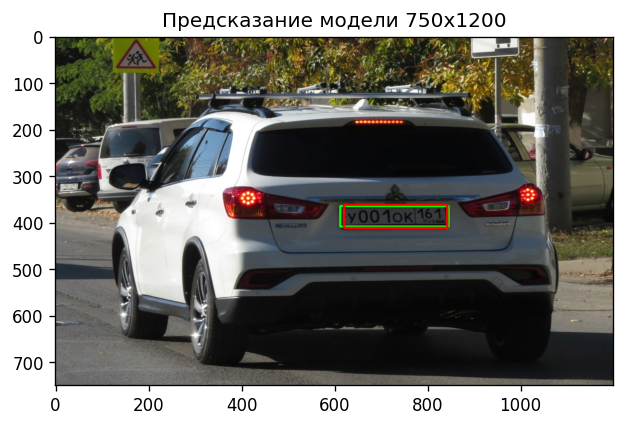

In [116]:
annotation = boxes['autonumber'][100]

_, sample_img = load_img(annotation['filename'])
pred = model.predict(np.array([sample_img,]))

decoded = decode_prediction(pred[0], conf_thr=0.1
                           )
decoded = non_max_suppression(decoded,
                              max_output_size=1,
                              iou_threshold=0.1)

plt.figure(figsize=(6, 6), dpi=120)
img = draw_boxes(annotation, decoded[0], (IMG_WIDTH, IMG_HEIGHT))
plt.imshow(img)
plt.title('Предсказание модели {}x{}'.format(*img.shape));

In [117]:
_, sample_img = load_img('А410АА-99.JPG')
pred = model.predict(np.array([sample_img,]))

decoded = decode_prediction(pred[0], conf_thr=0.01)
# decoded = non_max_suppression(decoded,
#                               max_output_size=5,
#                               iou_threshold=0.1)
print(decoded)
# annotation = {'filename':'А410АА-99.JPG',
#               'annotation': decoded[0]}

# plt.figure(figsize=(6, 6), dpi=120)
# img = draw_boxes(annotation, decoded[0], (IMG_WIDTH, IMG_HEIGHT))
# plt.imshow(img)
# plt.title('Предсказание модели {}x{}'.format(*img.shape));

[{'x': 804.38201395241, 'y': 367.327340271162, 'width': 199.80581998825073, 'height': 111.43124103546143, 'conf': 0.04017781638723811}]


In [118]:
decoded

[{'x': 804.38201395241,
  'y': 367.327340271162,
  'width': 199.80581998825073,
  'height': 111.43124103546143,
  'conf': 0.04017781638723811}]

In [119]:
def img_find_number(image_path):
    _, sample_img = load_img(image_path)
    pred = model.predict(np.array([sample_img,]))

    decoded = decode_prediction(pred[0], conf_thr=0)
    decoded = non_max_suppression(decoded,
                                  max_output_size=1,
                                  iou_threshold=0.1)

    annotation = {'filename':image_path}

    plt.figure(figsize=(6, 6), dpi=120)
    img = draw_boxes(annotation, decoded[0], (IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
    plt.title('Предсказание модели {}x{}'.format(*img.shape));
    
    return decoded

[{'x': 804.38201395241,
  'y': 367.327340271162,
  'width': 199.80581998825073,
  'height': 111.43124103546143,
  'conf': 0.04017781638723811}]

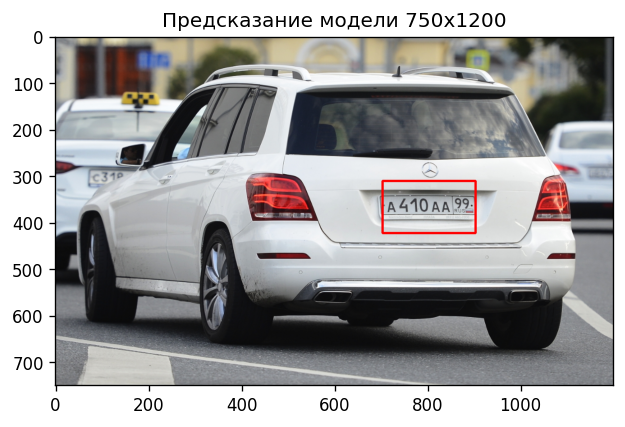

In [120]:
img_find_number('А410АА-99.JPG')

[{'x': 524.1365179822252,
  'y': 581.6641833471216,
  'width': 157.4631690979004,
  'height': 80.15493154525757,
  'conf': 0.5515873326379593}]

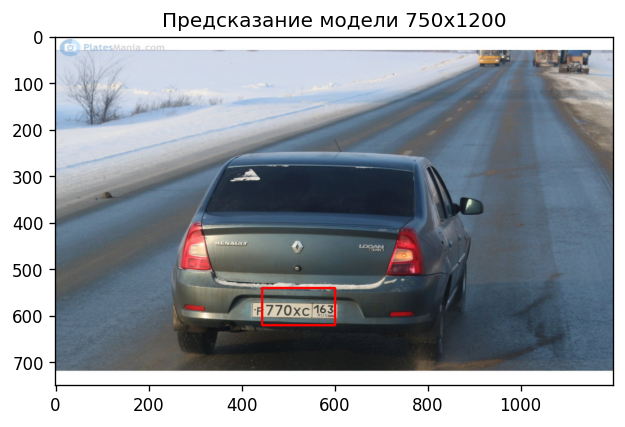

In [121]:
img_find_number('Р770ХС-163.JPG')

[{'x': 992.9010192284715,
  'y': 449.3113423171251,
  'width': 141.44579768180847,
  'height': 119.97619271278381,
  'conf': 0.009402218278488495}]

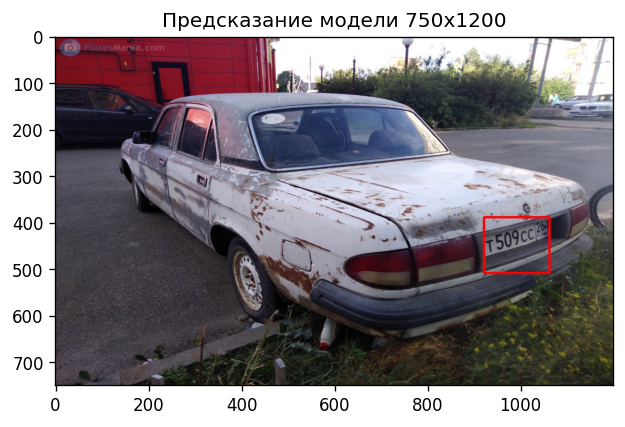

In [122]:
img_find_number('Т509СС-26.JPG')